In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df_events = pd.read_csv('./data/events.csv')

# Display the first few rows of the DataFrame
df_events.head()

,id,type,action,event_time,ed_app,course_offering_id,session_id,statement_type,statement_version,object_id,...,event__object_name,event__object_extensions_asset_name,event__object_extensions_asset_type,event__object_extensions_asset_subtype,event__object_extensions_entity_id,event__object_extensions_http_method,event__referrer,event__extensions_request_id,event__extensions_request_url,event__attachment_type
0,a3bd94baaa440f4793ad08bb64ed3a8f,NavigationEvent,navigatedto,2033-03-27 03:08:48.947000+00:00,NaN,NaN,f8eac5633f79de90a77b33338b14dd8e,NaN,NaN,0878d2f171deae54c6a81acc6ffeba20,...,attachment,file003.pdf,attachment,NaN,NaN,GET,NaN,NaN,NaN,pdf
1,0f137ee4ff1b603e3c9de17c5dc9a1d2,NavigationEvent,navigatedto,2033-03-30 16:23:40.909000+00:00,NaN,NaN,90d33cac1281c636931efa7646e1e1c3,NaN,NaN,0878d2f171deae54c6a81acc6ffeba20,...,attachment,file003.pdf,attachment,NaN,NaN,GET,NaN,NaN,NaN,pdf
2,86109c5350e06d3d7fe0ec880f37193e,NavigationEvent,navigatedto,2033-03-25 12:57:06.195000+00:00,NaN,NaN,2c3cdb1505e1c2dbf93d70b499668328,NaN,NaN,aa6bffb0a91e4f737a943dfddad70a7b,...,attachment,image006.png,attachment,NaN,NaN,GET,NaN,NaN,NaN,png
3,da5b96f601b39f14e2cc7de59bea35b9,NavigationEvent,navigatedto,2033-03-20 15:57:10.521000+00:00,NaN,NaN,bd87f5bcffda3d2f6de47cf02697f43b,NaN,NaN,aa6bffb0a91e4f737a943dfddad70a7b,...,attachment,image006.png,attachment,NaN,NaN,GET,NaN,NaN,NaN,png
4,7959480d52ab4c94821c122e27a48cd3,NavigationEvent,navigatedto,2033-01-11 18:05:29.939000+00:00,NaN,NaN,d5c5f36d8bc0ebc001c374f9daec961b,NaN,NaN,aa6bffb0a91e4f737a943dfddad70a7b,...,attachment,image006.png,attachment,NaN,NaN,GET,NaN,NaN,NaN,png


In [96]:
df_assignment = pd.read_csv('./data/assignments.csv')

In [97]:
df_discussion_topics= pd.read_csv('./data/discussion_topics.csv')

In [98]:
df_discussion= pd.read_csv('./data/discussions.csv')
df_enroll= pd.read_csv('./data/enrollments.csv')
df_file= pd.read_csv('./data/files.csv')
df_grade= pd.read_csv('./data/gradebook.csv')
df_module= pd.read_csv('./data/module_items.csv')
df_page= pd.read_csv('./data/pages.csv')

In [99]:
df_assignment

,id,due_at,unlock_at,lock_at,points_possible,grading_type,position,name,submission_types,has_submitted_submissions,workflow_state,published
0,c81f04547a95da2a7b88054ef491b7c4,2033-02-05 20:06:09+00:00,NaN,NaN,100,points,1,Assignment 1,['online_upload'],True,published,True
1,e5913deca98a20cf4dc4658b53168732,2033-02-05 20:06:09+00:00,NaN,NaN,100,points,2,Assignment 1 Copy,['online_upload'],False,unpublished,False
2,a4dc11e7e79361fc5886a9078aac66b8,2033-03-05 20:06:09+00:00,NaN,NaN,100,points,1,Assignment 2,['online_upload'],True,published,True
3,811d93ea379b5cdd5a19f1b5dbab88cd,2033-04-09 19:06:09+00:00,NaN,NaN,100,points,2,Assignment 3 (option A),['online_upload'],True,published,True
4,df8d1f1ff3f48fdc24a278b40c5f45cc,2033-04-09 19:06:09+00:00,NaN,NaN,100,points,3,Assignment 3 (option B),['online_upload'],True,published,True
5,bb971b36c1578cede00150acda89aa99,2033-04-09 19:06:09+00:00,NaN,NaN,100,points,4,Assignment 3 (option C),['online_upload'],True,published,True
6,f1ad954cd2cddda6e17f6fc225d1aa3e,2033-04-09 19:06:09+00:00,NaN,NaN,100,points,5,Assignment 3 (option D),['online_upload'],True,published,True
7,5965e0b0c712861d0efdd9be54572114,NaN,NaN,NaN,10,points,1,Participation grade: Formative (not included i...,['none'],False,unpublished,False
8,067f62cae2a61d43712cc7c84f1eb08a,NaN,NaN,NaN,10,points,2,Participation grade: Summative,['none'],False,published,True


In [100]:
discussion_topic = df_discussion.value_counts('discussion_topic_title')

In [101]:
df_discussion.sort_values('timestamp',asce)

NameError: name 'asce' is not defined

In [102]:
df_discussion.groupby('discussion_topic_title')['post_message_length'].mean().sort_values(ascending=False)

discussion_topic_title
Discussion 9: Aligning institutional plans with government policies        1676.053571
Discussion 3: Funding issues                                               1428.784615
Discussion 1: The meaning of eLearning                                     1407.702532
Discussion 2: Reflect on rationales for eLearning                          1377.535714
Discussion 7: eLearning planning at your institution?                      1320.714286
Discussion 6: Organization & support                                       1299.164286
Discussion 12: Analysis and comparison of approaches to eLearning          1171.428571
Discussion 5: Learner readiness for eLearning in the new era               1139.262626
Discussion 8: Critical reflection on some institutional strategic plans    1061.776316
Discussion 11: Reflections on eLearning implementation strategies          1038.336449
Discussion 4: Examples of faculty development for eLearning readiness       969.733871
Discussion 10: Refle

In [103]:
discussion_topic

discussion_topic_title
Introduce yourself                                                         281
Discussion 1: The meaning of eLearning                                     158
Discussion 2: Reflect on rationales for eLearning                          140
Discussion 6: Organization & support                                       140
Discussion 3: Funding issues                                               130
Discussion 4: Examples of faculty development for eLearning readiness      124
Discussion 11: Reflections on eLearning implementation strategies          107
Discussion 10: Reflections on eLearning readiness                           99
Discussion 5: Learner readiness for eLearning in the new era                99
Discussion 7: eLearning planning at your institution?                       84
Discussion 8: Critical reflection on some institutional strategic plans     76
Discussion 9: Aligning institutional plans with government policies         56
Casual Area                  

In [104]:
df_discussion['timestamp'] = pd.to_datetime(df_discussion['timestamp'],format='mixed')

In [105]:
df_events.dtypes

id                                         object
type                                       object
action                                     object
event_time                                 object
ed_app                                    float64
course_offering_id                        float64
session_id                                 object
statement_type                            float64
statement_version                         float64
object_id                                  object
membership_role                            object
actor_id                                   object
event__object_type                         object
event__object_name                         object
event__object_extensions_asset_name        object
event__object_extensions_asset_type        object
event__object_extensions_asset_subtype    float64
event__object_extensions_entity_id        float64
event__object_extensions_http_method       object
event__referrer                           float64


In [106]:
df_enroll

,user_id,type,last_activity_at,last_attended_at,total_activity_time
0,LEARNER_10,StudentEnrollment,2033-04-27 05:55:39+00:00,NaN,421763
1,LEARNER_7,StudentEnrollment,2033-04-27 06:25:33+00:00,NaN,2025102
2,LEARNER_8,StudentEnrollment,2033-04-28 04:21:40+00:00,NaN,1036998
3,LEARNER_20,StudentEnrollment,2033-05-18 01:43:47+00:00,NaN,201541
4,LEARNER_13,StudentEnrollment,2033-06-05 14:42:45+00:00,NaN,774430
5,LEARNER_37,StudentEnrollment,2033-05-05 13:00:26+00:00,NaN,862185
6,LEARNER_23,StudentEnrollment,2033-04-29 09:59:40+00:00,NaN,698439
7,LEARNER_14,StudentEnrollment,2033-04-27 14:18:30+00:00,NaN,155823
8,LEARNER_35,StudentEnrollment,2033-04-24 10:33:50+00:00,NaN,209140
9,LEARNER_11,StudentEnrollment,2033-05-15 00:38:06+00:00,NaN,285214


In [107]:
df_enroll.sort_values('total_activity_time', ascending = False)

,user_id,type,last_activity_at,last_attended_at,total_activity_time
1,LEARNER_7,StudentEnrollment,2033-04-27 06:25:33+00:00,NaN,2025102
27,LEARNER_29,StudentEnrollment,2033-09-08 04:13:52+00:00,NaN,1575148
21,LEARNER_30,StudentEnrollment,2033-05-10 01:39:35+00:00,NaN,1371523
2,LEARNER_8,StudentEnrollment,2033-04-28 04:21:40+00:00,NaN,1036998
25,LEARNER_17,StudentEnrollment,2033-05-13 09:15:31+00:00,NaN,1015778
10,LEARNER_31,StudentEnrollment,2033-04-26 16:31:35+00:00,NaN,1011355
29,LEARNER_1,StudentEnrollment,2033-05-26 03:10:40+00:00,NaN,985351
5,LEARNER_37,StudentEnrollment,2033-05-05 13:00:26+00:00,NaN,862185
4,LEARNER_13,StudentEnrollment,2033-06-05 14:42:45+00:00,NaN,774430
6,LEARNER_23,StudentEnrollment,2033-04-29 09:59:40+00:00,NaN,698439


In [108]:
def grade(x):
    if x >= 90:
        Grade = 'A+'
    elif x >= 85:
        Grade = 'A'
    elif x >= 80:
        Grade = 'A-'
    elif x >= 76:
        Grade = 'B+'
    elif x >= 72:
        Grade = 'B'
    elif x >= 68:
        Grade = 'B-'
    elif x >= 62:
        Grade = 'C'
    elif x >= 60:
        Grade = 'D'    
    else:
        Grade = 'F'     
    return(Grade)        
        

In [109]:
df_file

,id,filename_masked,content-type,hidden,mime_class,media_entry_id,category
0,4ddd0c7b98c54bd1745ee38778c6ec5b,file016.pdf,application/pdf,False,pdf,NaN,uncategorized
1,4ebde2ecce47a0f01ade2ad63bb22eec,image018.png,image/png,False,image,NaN,uncategorized
2,d7eb139c1e154130f23d54bb0065753e,image019.png,image/png,False,image,NaN,uncategorized
3,b22a9119e77a2dae0aeed4f0792cdc8a,file012.pdf,application/pdf,False,pdf,NaN,uncategorized
4,75e5fb5b794e8fdbef25ad94b0e985c7,image029.png,image/png,False,image,NaN,uncategorized
...,...,...,...,...,...,...,...
75,fd03c31b9d4dca17436100f8e37bb0b2,image004.jpg,image/jpeg,True,image,NaN,uncategorized
76,6ff09aba3e7ff346f2075f8311e7636e,file010.pdf,application/pdf,True,pdf,NaN,uncategorized
77,3d8c50642d188561057245227629b338,image048.png,image/png,True,image,NaN,uncategorized
78,91e6a94d004b400eb47fd4c075f387a8,image049.png,image/png,True,image,NaN,uncategorized


In [110]:
import numpy as np

In [111]:
df_grade = df_grade[2:]

In [112]:
df_grade.dtypes

Student                                                                                            object
Assignment 1 (c81f04547a95da2a7b88054ef491b7c4)                                                    object
Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8)                                                    object
Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd)                                         object
Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc)                                         object
Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99)                                         object
Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e)                                         object
Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114)    object
Assignment 1 Current Score                                                                         object
Assignment 2 Current Score                    

In [113]:
df_grade['Assignment 1 Current Score'] = pd.to_numeric(df_grade['Assignment 1 Current Score'], errors='coerce')

In [114]:
df_grade['Assignment 2 Current Score'] = pd.to_numeric(df_grade['Assignment 2 Current Score'], errors='coerce')
df_grade['Assignment 3 Current Score'] = pd.to_numeric(df_grade['Assignment 3 Current Score'], errors='coerce')
df_grade['Current Score'] = pd.to_numeric(df_grade['Current Score'], errors='coerce')
df_grade['Participation & engagement Current Score'] = pd.to_numeric(df_grade['Participation & engagement Current Score'], errors='coerce')

In [115]:
df_grade.describe()

,Assignment 1 Current Score,Assignment 2 Current Score,Assignment 3 Current Score,Participation & engagement Current Score,Current Score
count,34.000000,33.000000,33.000000,33.000000,34.000000
mean,85.852941,83.000000,78.242424,77.878788,79.238235
std,8.835645,6.777721,6.442196,18.372462,13.219155
min,56.000000,65.000000,59.000000,40.000000,13.800000
25%,80.500000,79.000000,74.000000,60.000000,78.000000
50%,89.500000,84.000000,77.000000,80.000000,82.150000
75%,91.750000,87.000000,83.000000,90.000000,85.650000
max,95.000000,94.000000,95.000000,100.000000,92.200000


In [116]:
df_discussion[df_discussion['actor_id'] == 'INSTRUCTOR'].sort_values('timestamp',ascending= False)

,actor_id,membership_role,timestamp,post_id,post_parent_id,discussion_topic_title,discussion_topic_id,discussion_topic_message_length,post_message_length,count_of_likes
32,INSTRUCTOR,"[""Instructor""]",2033-04-06 16:27:30+00:00,38104398a61d6f4020541030da6c131d,6263b0ec3f0bffcfb7d68b342523f49d,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,264,748,1
362,INSTRUCTOR,"[""Instructor""]",2033-04-03 12:41:30+00:00,fabdc2e97c8abcddbf196f874184fc1e,ef637f493a491c192c51ae541b97e1f8,Discussion 11: Reflections on eLearning implem...,0a31f2efd159230560dab31d27756fb1,422,1142,1
405,INSTRUCTOR,"[""Instructor""]",2033-04-03 12:33:55+00:00,016be097437c9a014f94bf6d43c68029,3944e72743eb448f229b80d6623c2787,Discussion 11: Reflections on eLearning implem...,0a31f2efd159230560dab31d27756fb1,422,660,0
387,INSTRUCTOR,"[""Instructor""]",2033-04-03 12:15:12+00:00,b9f686316ec392580846f00d474ecdb3,ee8d493fc0d6b7adab80fb40834e1934,Discussion 11: Reflections on eLearning implem...,0a31f2efd159230560dab31d27756fb1,422,194,0
302,INSTRUCTOR,"[""Instructor""]",2033-04-03 12:13:25+00:00,af094181c729570355e2656b55b7bc89,0cb995a3d67c56807f376b8b9e1ca313,Discussion 10: Reflections on eLearning readiness,77db8e17563955af14dd1bea5d82a703,546,498,0
...,...,...,...,...,...,...,...,...,...,...
1323,INSTRUCTOR,"[""Instructor""]",2033-01-09 10:55:30+00:00,9d8502d83a312788b4dbe74fa91419b8,4f855e1e0f7592924a6f9f1992fa0513,Introduce yourself,e1f90c16c123e0f96b2af7d94a1c335c,611,412,1
1319,INSTRUCTOR,"[""Instructor""]",2033-01-09 10:52:45+00:00,4555119a3bcbfad2d05a2e1c4d33eeed,2e9f75c230e5bc74f3ca9db544a9a5b0,Introduce yourself,e1f90c16c123e0f96b2af7d94a1c335c,611,229,0
1321,INSTRUCTOR,"[""Instructor""]",2033-01-09 10:52:01+00:00,622e5b8102beb502994f2915d1c96888,d1f238daf26b9627878396a0f2bc965e,Introduce yourself,e1f90c16c123e0f96b2af7d94a1c335c,611,77,0
1463,INSTRUCTOR,"[""Instructor""]",2033-01-07 09:26:44+00:00,94c90eb54319dafb5939b0d6155e83aa,6113a4bff5a2382fd4b241441346b88b,Introduce yourself,e1f90c16c123e0f96b2af7d94a1c335c,611,1843,2


In [117]:
df_discussion.sort_index().drop_duplicates('discussion_topic_title',keep='first')

,actor_id,membership_role,timestamp,post_id,post_parent_id,discussion_topic_title,discussion_topic_id,discussion_topic_message_length,post_message_length,count_of_likes
0,INSTRUCTOR,"[""Instructor""]",2033-01-18 17:13:01+00:00,e29fca96e5557a20cabec778dc885345,1e1288fa5e19f13c45b0231e8cbedab6,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,367,0,0
34,INSTRUCTOR,"[""Instructor""]",2033-01-26 09:07:08+00:00,6abda12d4240a8f7812f8c7d09d0774f,e5de10d02b5e478fce4fab58dd02585b,Casual Area,a475fae949c627a4125abbfcf0faeaa8,223,852,3
69,LEARNER_7,"[""Learner""]",2033-01-16 15:18:22+00:00,8be07b88d225b515f1b0179bef5db5ea,75c1bd7db9d2f551d7a45aaf5173f70f,Discussion 1: The meaning of eLearning,c916612763c04832d8e7b9e89deb7d2a,1369,1792,0
227,LEARNER_23,"[""Learner""]",2033-03-22 10:25:35+00:00,1d163d20f416999df0368481a655c73c,3577ae3441da7d0f140f5c37362e5d24,Discussion 10: Reflections on eLearning readiness,77db8e17563955af14dd1bea5d82a703,546,1362,1
326,LEARNER_23,"[""Learner""]",2033-03-27 06:23:19+00:00,d19ce3d6090638ed27d3fbd9fbfe9220,1c53b2d2f5d6a829c4a400b7a36c83c7,Discussion 11: Reflections on eLearning implem...,0a31f2efd159230560dab31d27756fb1,422,1178,0
433,LEARNER_10,"[""Learner""]",2033-04-04 12:56:34+00:00,3da84e1300bb07a98842dc4c97e10535,5fc64a3256e9ae8b37443fbaf40e0d7b,Discussion 12: Analysis and comparison of appr...,449cbcaffb247e04fa8151f487926aab,388,2000,0
468,LEARNER_2,"[""Learner""]",2033-01-22 17:53:26+00:00,0721a9441c5083add3dc5032264d5f0c,62adfea9fb43919a13b87b840aca0452,Discussion 2: Reflect on rationales for eLearning,7c9e39571ad00fe24282e5b5366d7563,711,2455,0
608,LEARNER_11,"[""Learner""]",2033-01-31 06:56:40+00:00,8110b011fce3c0e767cabea9e81aff38,b9809bd5a30ee78515f56f1d120db9f7,Discussion 3: Funding issues,bb62cd396b9a8a94ecef6b5d1c4f8ad1,1585,3149,0
738,LEARNER_23,"[""Learner""]",2033-02-06 11:16:06+00:00,f6f202bfca7b1ca317df3393cae582f1,d2337563336c64414c27878063c9a4f8,Discussion 4: Examples of faculty development ...,38da9c46ca05b04b0b0335af760c3bdd,1398,1074,0
862,LEARNER_23,"[""Learner""]",2033-02-07 11:08:11+00:00,919a81193bc5bb760d283def28e1a4e4,7706b10ccfa774e114bdf63a78fdd046,Discussion 5: Learner readiness for eLearning ...,1b4199b940079ccb8dc5f404b9324e43,783,1945,0


In [118]:
df_grade.sort_values('Current Score',ascending = False)

,Student,Assignment 1 (c81f04547a95da2a7b88054ef491b7c4),Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8),Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd),Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc),Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99),Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e),Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114),Assignment 1 Current Score,Assignment 2 Current Score,Assignment 3 Current Score,Participation & engagement Current Score,Current Score
25,LEARNER_6,94,94,NaN,84,NaN,NaN,10,94,94.0,84.0,100.0,92.2
16,LEARNER_23,91,87,83,NaN,NaN,NaN,10,91,87.0,83.0,100.0,89.2
28,LEARNER_3,94,92,NaN,NaN,82,NaN,9,94,92.0,82.0,90.0,89.0
34,LEARNER_5,91,82,84,NaN,NaN,NaN,10,91,82.0,84.0,100.0,88.0
33,LEARNER_26,90,83,NaN,NaN,82,NaN,10,90,83.0,82.0,100.0,87.5
6,LEARNER_7,92,83,NaN,NaN,80,NaN,10,92,83.0,80.0,100.0,87.3
32,LEARNER_25,93,88,81,NaN,NaN,NaN,9,93,88.0,81.0,90.0,87.3
22,LEARNER_24,95,90,NaN,NaN,78,NaN,8.5,95,90.0,78.0,85.0,86.4
19,LEARNER_29,89,90,83,NaN,NaN,NaN,8,89,90.0,83.0,80.0,85.7
13,LEARNER_13,88,86,87,NaN,NaN,NaN,8,88,86.0,87.0,80.0,85.5


In [119]:
df_grade.sort_values('Assignment 1 Current Score',ascending = False)

,Student,Assignment 1 (c81f04547a95da2a7b88054ef491b7c4),Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8),Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd),Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc),Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99),Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e),Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114),Assignment 1 Current Score,Assignment 2 Current Score,Assignment 3 Current Score,Participation & engagement Current Score,Current Score
22,LEARNER_24,95,90,NaN,NaN,78,NaN,8.5,95,90.0,78.0,85.0,86.4
17,LEARNER_14,95,92,NaN,86,NaN,NaN,6,95,92.0,86.0,60.0,84.4
14,LEARNER_37,94,82,83,NaN,NaN,NaN,7,94,82.0,83.0,70.0,82.3
25,LEARNER_6,94,94,NaN,84,NaN,NaN,10,94,94.0,84.0,100.0,92.2
28,LEARNER_3,94,92,NaN,NaN,82,NaN,9,94,92.0,82.0,90.0,89.0
32,LEARNER_25,93,88,81,NaN,NaN,NaN,9,93,88.0,81.0,90.0,87.3
26,LEARNER_2,93,85,NaN,NaN,NaN,95,6,93,85.0,95.0,60.0,84.6
6,LEARNER_7,92,83,NaN,NaN,80,NaN,10,92,83.0,80.0,100.0,87.3
20,LEARNER_35,92,72,NaN,77,NaN,NaN,8,92,72.0,77.0,80.0,79.1
34,LEARNER_5,91,82,84,NaN,NaN,NaN,10,91,82.0,84.0,100.0,88.0


In [120]:
df_module

,id,title,position,indent,quiz_lti,type,module_id,page_url,published,content_id,module_name,module_position
0,26503cd777cadb209a97e307a1ec3af8,Assignment 1,14,1,False,Assignment,7e7c000c755210949c3819a0e3a3eb74,NaN,True,dcccda945258b1f93f8991c7c1f9e2d8,Module 1: Understanding eLearning (two weeks l...,3
1,fcdfbc030a9ac50c06ce4a9ebc14b729,Assignment 1,3,1,False,Assignment,9be3f97935920a983d9274a6c54dfbb8,NaN,True,dcccda945258b1f93f8991c7c1f9e2d8,Module 2: eLearning readiness (two weeks long),4
2,fd315af316a5a6e8d9cab40dc39bf569,Assignment 2,10,1,False,Assignment,ce26f7eecd5831e66a3ac4067c3e3733,NaN,True,e0a7643d52f694d38361baef57479a70,Module 3: Institutional organization and suppo...,5
3,38947f69cb85333c28dbd319d307f559,Assignment 2,3,1,False,Assignment,3abc203cbf91a7e349498e9fe130eba5,NaN,True,e0a7643d52f694d38361baef57479a70,Module 4: Institutional planning for eLearning...,6
4,ec099680e4eb97832df74a928397fbb5,Discussion 9: Aligning institutional plans wit...,7,1,False,Discussion,cc2bdba2e0464b8a4a08f016520a4222,NaN,True,6f51d776df9d2b06eaf568e77ab46fee,Module 5: Government planning for eLearning (t...,7
...,...,...,...,...,...,...,...,...,...,...,...,...
91,e8731c5a13d6939af6e42ec72dd08b30,6.5 Identifying eLearning projects for develop...,6,0,False,Page,25f8150c21897b2f4d249fddcb8e9890,6-dot-5-identifying-elearning-projects-for-dev...,True,NaN,Module 6: Implementing eLearning (two weeks long),8
92,484ad26eecc609fb89ba2e2da45d521e,6.6 Blended approaches to eLearning,8,0,False,Page,25f8150c21897b2f4d249fddcb8e9890,6-dot-6-blended-approaches-to-elearning,True,NaN,Module 6: Implementing eLearning (two weeks long),8
93,d0baa7bf433e1c9f3c130c310af3945c,6.7 Case study: University of Central Florida,9,0,False,Page,25f8150c21897b2f4d249fddcb8e9890,6-dot-7-case-study-university-of-central-florida,True,NaN,Module 6: Implementing eLearning (two weeks long),8
94,694c8c97d548770b40f04f4d5ffcc471,6.8 Case study: UBC,10,0,False,Page,25f8150c21897b2f4d249fddcb8e9890,6-dot-8-case-study-ubc,True,NaN,Module 6: Implementing eLearning (two weeks long),8


In [121]:
df_page

,title,page_url,id,published
0,0.1 Course overview,0-dot-1-course-overview,b1d898888f6c7b3835249eafba32fda8,True
1,0.10 UBC grading guidelines,0-dot-10-ubc-grading-guidelines,d4e9d4c9e20351932d918333d0ac5d5d,True
2,0.11 Academic misconduct,0-dot-11-academic-misconduct,319770f1c152eab3ecc23afe264b2f12,True
3,"0.12 Accessibility, equity & diversity, netiqu...",0-dot-12-accessibility-equity-and-diversity-ne...,9b956857f78a44a200aedbc13825b886,True
4,0.13 Learning analytics,0-dot-13-learning-analytics,2d1bb7da0411ccc855e29a7455ae20f7,True
...,...,...,...,...
87,[wikipage] Assignment 2 Group sign up,wikipage-assignment-2-group-sign-up,972196dd128aeb62a66f5c02b897e7dd,True
88,Wikipage Assignment 2 Group Sign Up (Optional),wikipage-assignment-2-group-sign-up-optional,9ee9a2cacefb8be58dde2a381617e0ad,True
89,[wikipage] Assignment 3 Group sign up (optional),wikipage-assignment-3-group-sign-up-optional,0790ff605875f7393f9fde5c50c3eae4,True
90,Your Instructor,your-instructor,47cc5ac28d341bcc8e175c649974a314,True


In [122]:
df_grade_enroll = df_grade.merge(df_enroll,left_on='Student',right_on='user_id',how='left')
df_grade_enroll.dtypes

Student                                                                                             object
Assignment 1 (c81f04547a95da2a7b88054ef491b7c4)                                                     object
Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8)                                                     object
Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd)                                          object
Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc)                                          object
Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99)                                          object
Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e)                                          object
Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114)     object
Assignment 1 Current Score                                                                           int64
Assignment 2 Current Score           

In [149]:
df_grade_enroll['Grade']=df_grade_enroll['Current Score'].apply(grade)
df_grade_enroll[df_grade_enroll['Grade'] == 'F']

,Student,Assignment 1 (c81f04547a95da2a7b88054ef491b7c4),Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8),Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd),Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc),Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99),Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e),Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114),Assignment 1 Current Score,Assignment 2 Current Score,Assignment 3 Current Score,Participation & engagement Current Score,Current Score,user_id,type,last_activity_at,last_attended_at,total_activity_time,Grade
27,LEARNER_48,69,NaN,NaN,NaN,NaN,NaN,NaN,69,NaN,NaN,NaN,13.8,LEARNER_48,StudentViewEnrollment,2033-02-15 12:45:26+00:00,NaN,0,F
28,LEARNER_48,69,NaN,NaN,NaN,NaN,NaN,NaN,69,NaN,NaN,NaN,13.8,LEARNER_48,StudentViewEnrollment,2033-02-15 12:45:26+00:00,NaN,0,F


In [124]:
avg_time = df_grade_enroll.groupby('Grade')['total_activity_time'].mean()

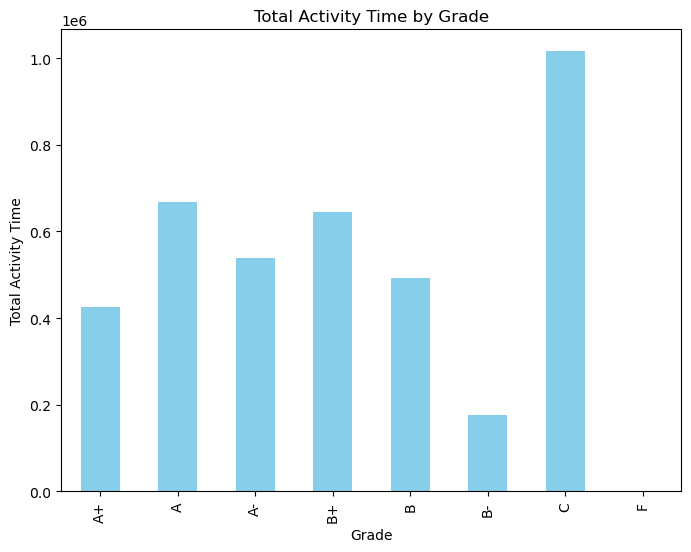

In [125]:
data = {
    'Grade': ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C', 'F'],
    'total_activity_time': [426200.0, 667417.8, 538334.0, 645786.4, 492165.0, 175719.0, 1015778.0, 0.0]
}

series = pd.Series(data['total_activity_time'], index=data['Grade'])

# Create a bar plot
plt.figure(figsize=(8, 6))
series.plot(kind='bar', color='skyblue')
plt.xlabel('Grade')
plt.ylabel('Total Activity Time')
plt.title('Total Activity Time by Grade')
plt.savefig('Grade vs Time')

# Show the plot
plt.show()

In [126]:
# Summary statistics of the data
summary_statistics = df_grade.describe()
summary_statistics

,Assignment 1 Current Score,Assignment 2 Current Score,Assignment 3 Current Score,Participation & engagement Current Score,Current Score
count,34.000000,33.000000,33.000000,33.000000,34.000000
mean,85.852941,83.000000,78.242424,77.878788,79.238235
std,8.835645,6.777721,6.442196,18.372462,13.219155
min,56.000000,65.000000,59.000000,40.000000,13.800000
25%,80.500000,79.000000,74.000000,60.000000,78.000000
50%,89.500000,84.000000,77.000000,80.000000,82.150000
75%,91.750000,87.000000,83.000000,90.000000,85.650000
max,95.000000,94.000000,95.000000,100.000000,92.200000


In [127]:
# Visualize the data
df_events['event_time'] = pd.to_datetime(df_events['event_time'],format='mixed')

In [128]:
df_events['event_time'][1]

Timestamp('2033-03-30 16:23:40.909000+0000', tz='UTC')

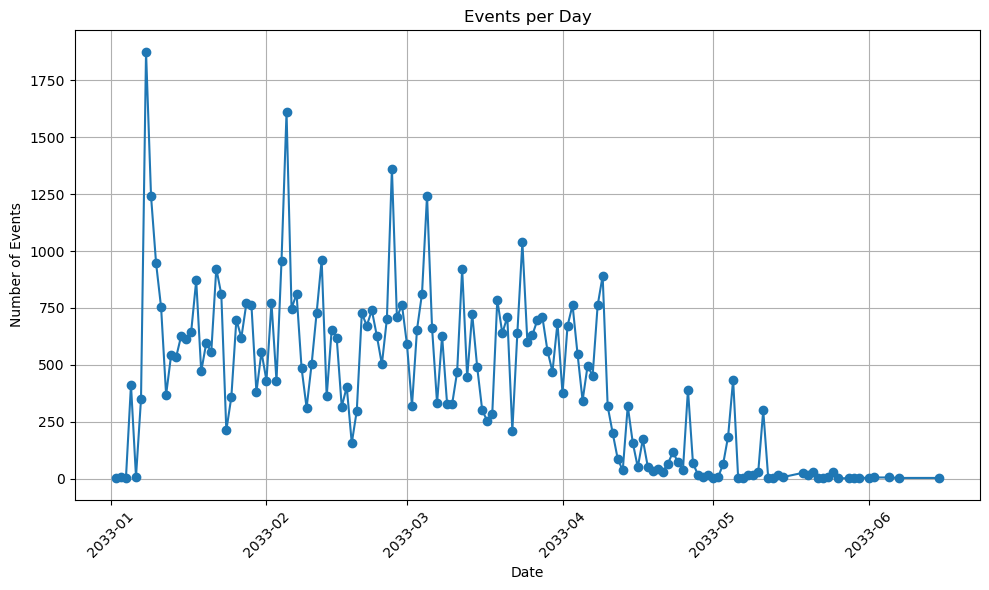

In [129]:
# Group the events by day and count the number of events per day
daily_events = df_events['event_time'].dt.date.value_counts().sort_index()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(daily_events.index, daily_events.values, marker='o', linestyle='-')
plt.title('Events per Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(True)

# Display the graph
plt.tight_layout()
plt.show()

In [130]:
import datetime

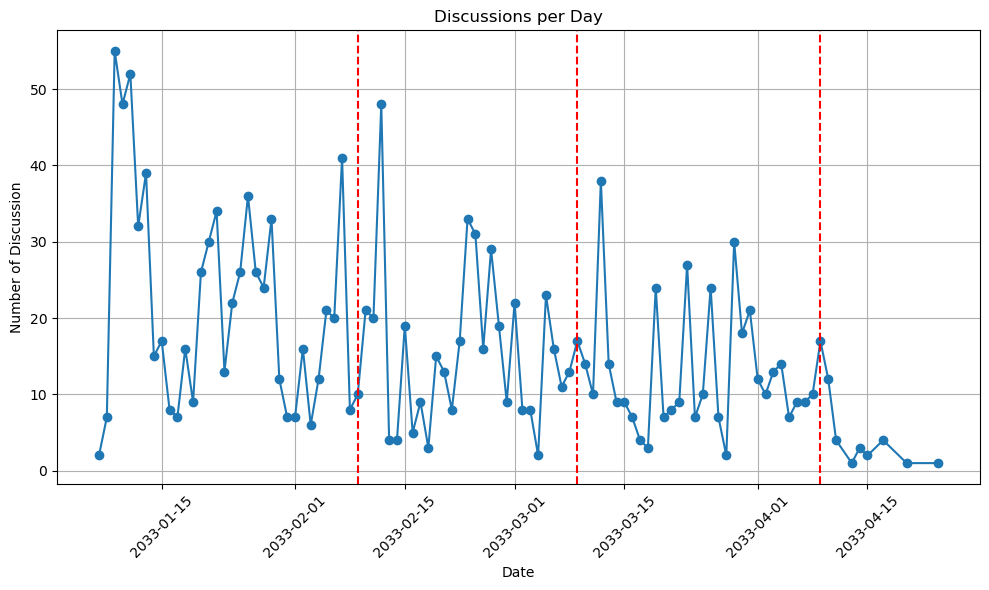

In [131]:
# Group the events by day and count the number of events per day
daily_discussion = df_discussion['timestamp'].dt.date.value_counts().sort_index()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(daily_discussion.index, daily_discussion.values, marker='o', linestyle='-')
plt.title('Discussions per Day')
plt.xlabel('Date')
plt.ylabel('Number of Discussion')
plt.xticks(rotation=45)
plt.grid(True)

vertical_line_date = datetime.date(2033, 2, 9)
plt.axvline(x=vertical_line_date, color='red', linestyle='--', label='Vertical Line')

vertical_line_date = datetime.date(2033, 3, 9)
plt.axvline(x=vertical_line_date, color='red', linestyle='--', label='Vertical Line')

vertical_line_date = datetime.date(2033, 4, 9)
plt.axvline(x=vertical_line_date, color='red', linestyle='--', label='Vertical Line')


# Display the graph
plt.tight_layout()

plt.savefig('discussions per day')
plt.show()

In [132]:
df_grade[['Assignment 1 Current Score','Assignment 2 Current Score','Assignment 3 Current Score','Participation & engagement Current Score','Current Score']].corr()

,Assignment 1 Current Score,Assignment 2 Current Score,Assignment 3 Current Score,Participation & engagement Current Score,Current Score
Assignment 1 Current Score,1.000000,0.152822,0.390521,0.495404,0.615685
Assignment 2 Current Score,0.152822,1.000000,0.322782,0.115440,0.513262
Assignment 3 Current Score,0.390521,0.322782,1.000000,0.288310,0.662136
Participation & engagement Current Score,0.495404,0.115440,0.288310,1.000000,0.815100
Current Score,0.615685,0.513262,0.662136,0.815100,1.000000


In [133]:
# Basic descriptive statistics
print(df_discussion[['discussion_topic_message_length', 'post_message_length']].describe())

       discussion_topic_message_length  post_message_length
count                      1611.000000          1611.000000
mean                        917.047796          1079.855990
std                         433.600259           952.027795
min                          79.000000             0.000000
25%                         611.000000           402.000000
50%                         783.000000           785.000000
75%                        1369.000000          1475.000000
max                        2359.000000          6298.000000


In [134]:
df_discussion

,actor_id,membership_role,timestamp,post_id,post_parent_id,discussion_topic_title,discussion_topic_id,discussion_topic_message_length,post_message_length,count_of_likes
0,INSTRUCTOR,"[""Instructor""]",2033-01-18 17:13:01+00:00,e29fca96e5557a20cabec778dc885345,1e1288fa5e19f13c45b0231e8cbedab6,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,367,0,0
1,INSTRUCTOR,"[""Instructor""]",2033-01-18 17:13:02+00:00,cf6816ae103ab5e2c82d6595eb49e02e,1e1288fa5e19f13c45b0231e8cbedab6,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,0,0
2,LEARNER_3,"[""Learner""]",2033-01-28 06:55:40+00:00,abb6c24171f8b195cf0d050858e4ff18,cf6816ae103ab5e2c82d6595eb49e02e,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,564,0
3,LEARNER_11,"[""Learner""]",2033-01-29 01:04:32+00:00,a250f9cde1c58d4dba3d4f918e82a018,abb6c24171f8b195cf0d050858e4ff18,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,174,0
4,LEARNER_3,"[""Learner""]",2033-01-29 05:54:31+00:00,3ac8537702d3d7d8bf033d73a4491591,a250f9cde1c58d4dba3d4f918e82a018,Assignment 1 Discussion forum,132f3fab56d60839d727b966a76c1b1e,79,226,0
...,...,...,...,...,...,...,...,...,...,...
1606,LEARNER_19,"[""Learner""]",2033-03-23 15:59:20+00:00,7a91b20369b9853e87f56d13600bb2a5,d6fe64dc8c4e1ede591ff45a98e7255c,Q&A with Guest Speaker,3bc2d8a4ae8dfa21b926bc34599560e2,332,1100,0
1607,INSTRUCTOR,"[""Instructor""]",2033-03-24 09:51:33+00:00,ed80eb6d2d9f9f86fec336142fb849af,d6fe64dc8c4e1ede591ff45a98e7255c,Q&A with Guest Speaker,3bc2d8a4ae8dfa21b926bc34599560e2,332,111,0
1608,LEARNER_14,"[""Learner""]",2033-03-24 10:01:51+00:00,a1210d7d04b9dc8555f53e773af18a28,d6fe64dc8c4e1ede591ff45a98e7255c,Q&A with Guest Speaker,3bc2d8a4ae8dfa21b926bc34599560e2,332,611,0
1609,LEARNER_2,"[""Learner""]",2033-03-26 16:10:40+00:00,d6d1a9d82c7fa0226e012984b81c0e41,d6fe64dc8c4e1ede591ff45a98e7255c,Q&A with Guest Speaker,3bc2d8a4ae8dfa21b926bc34599560e2,332,237,0


In [135]:
# Count of posts by actor
posts_by_actor = df_discussion['actor_id'].value_counts()
print(posts_by_actor.head())

actor_id
INSTRUCTOR    254
LEARNER_6     166
LEARNER_4     111
LEARNER_7      88
LEARNER_5      64
Name: count, dtype: int64


In [136]:
# Sum of likes by actor
likes_by_actor = df_discussion.groupby('actor_id')['count_of_likes'].sum()
print(likes_by_actor.sort_values(ascending=False).head())

actor_id
INSTRUCTOR    85
LEARNER_7     26
LEARNER_6     24
LEARNER_23    22
LEARNER_4     18
Name: count_of_likes, dtype: int64


In [137]:
# Convert 'timestamp' to datetime
df_discussion['timestamp'] = pd.to_datetime(df_discussion['timestamp'])

# Set 'timestamp' as index
df_discussion.set_index('timestamp', inplace=True)

# Resample to get monthly counts of posts
monthly_posts = df_discussion['post_id'].resample('M').count()
# monthly post counts
print(monthly_posts)

timestamp
2033-01-31 00:00:00+00:00    596
2033-02-28 00:00:00+00:00    464
2033-03-31 00:00:00+00:00    422
2033-04-30 00:00:00+00:00    129
Freq: M, Name: post_id, dtype: int64


In [138]:
# Group by 'discussion_topic_id' and 'discussion_topic_title' and count the number of posts for each group
topic_counts = df_discussion.groupby(['discussion_topic_id', 'discussion_topic_title']).size()

# Sort the counts in descending order to find the most discussed topics
popular_topics_with_titles = topic_counts.sort_values(ascending=False)

# Display the top 5 most discussed topics with titles
print(popular_topics_with_titles.head())

discussion_topic_id               discussion_topic_title                           
e1f90c16c123e0f96b2af7d94a1c335c  Introduce yourself                                   281
c916612763c04832d8e7b9e89deb7d2a  Discussion 1: The meaning of eLearning               158
74d57e9d2bfa697878ac88bca9170c78  Discussion 6: Organization & support                 140
7c9e39571ad00fe24282e5b5366d7563  Discussion 2: Reflect on rationales for eLearning    140
bb62cd396b9a8a94ecef6b5d1c4f8ad1  Discussion 3: Funding issues                         130
dtype: int64


In [139]:
# Average post message length by membership role
avg_length_by_role = df_discussion.groupby('membership_role')['post_message_length'].mean()
print(avg_length_by_role)

membership_role
["Instructor"]     661.090551
["Learner"]       1158.239499
Name: post_message_length, dtype: float64


In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

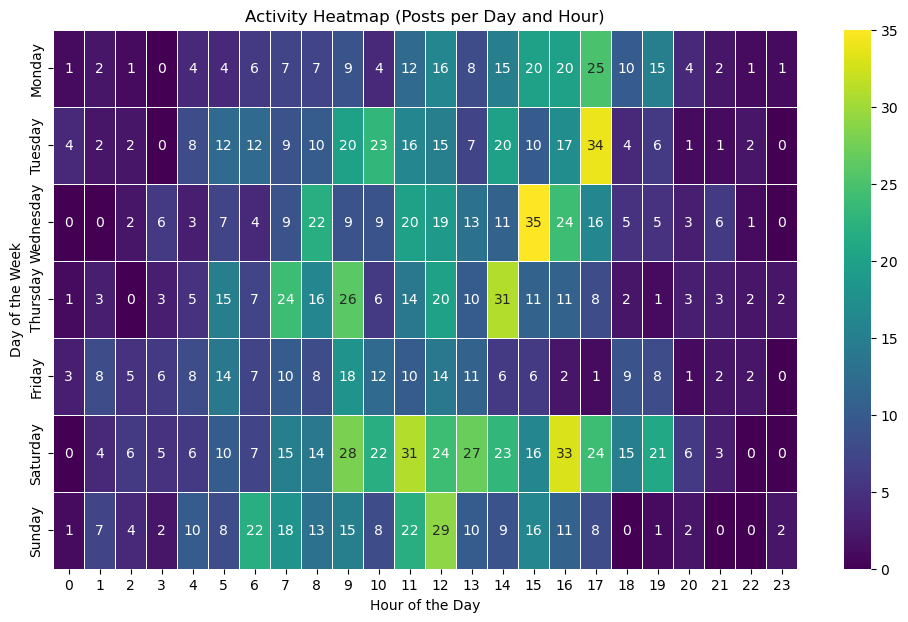

In [141]:
# new column for the hour of the day and the day of the week
df_discussion['hour'] = df_discussion.index.hour
df_discussion['day_of_week'] = df_discussion.index.day_name()

# for the heatmap; count the number of posts in each hour for each day
activity_matrix = df_discussion.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# Order the days of the week starting from Monday
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
activity_matrix = activity_matrix.reindex(ordered_days)

# Plot the heatmap
plt.figure(figsize=(12, 7))  # You can adjust the size as needed
sns.heatmap(activity_matrix, cmap='viridis', linewidths=.5, annot=True)

# Add labels and a title
plt.title('Activity Heatmap (Posts per Day and Hour)')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.savefig('heatmap')

# Show the plot
plt.show()

In [142]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [143]:

import nltk
from nltk import FreqDist

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chloe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chloe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [144]:
# Assuming 'discussion_subentry_count' is a column in your dataframe
# We sort the dataframe based on 'discussion_subentry_count' in descending order
df_discussion_topics_sorted = df_discussion_topics.sort_values(by='discussion_subentry_count', ascending=False)

In [145]:
# Select the top N discussions
top_discussions = df_discussion_topics_sorted.head(10)

In [146]:
stop_words= stopwords.words('english')

In [147]:
# Get the titles of the top discussions
top_titles = ' '.join(top_discussions['title'].dropna().values)

# Tokenize and clean the titles as before
top_tokens = word_tokenize(top_titles)
top_words = [word.lower() for word in top_tokens if word.isalpha() and word.lower() not in stop_words]

# Frequency distribution for top words
top_fdist = FreqDist(top_words)
for word, frequency in top_fdist.most_common(10):
    print(f'{word}: {frequency}')

discussion: 8
elearning: 4
assignment: 3
forum: 3
readiness: 2
reflections: 2
casual: 1
area: 1
q: 1
guest: 1


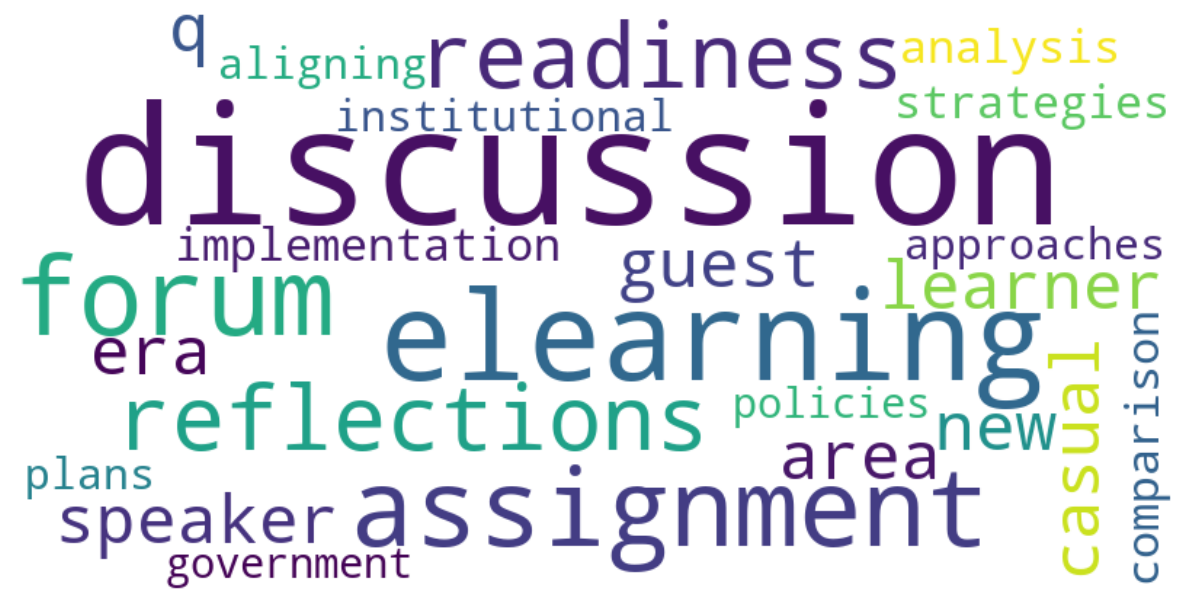

In [148]:
# Generate a word cloud image for top discussions
top_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(top_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud')
plt.show()
